# TODO
1. 全体
 1.  openとcloseの時間を調べる  
 1. 変数表の作成　
 1. 設計の作成　
1. AI
 1. Confution matrix
 1. Validation dataに分離
1. UI


## Program Flow

1. モジュールインポート


In [20]:
# 変数定義
pram_predict_days=     [-5,-3,-2,-1]   #予想日(-1,-2,-3,-5日後)
pram_predict_percents= [0.5,1,2,3]   #数日後の何パーセント上昇するかを当てる(+0.5,1,2,3%)
pram_buymodes=         ["buy",""]  # 購入モードの変更　buyの場合は、買ったらその日にすぐにうる。売るときには(buy,"")
pram_predict_day=1
pram_predict_percent=0.5
pram_traing_rate=0.8
pram_epoch=30
pram_buymode=""

model_name="TEST"
YEAR=""
open_index =1
close_index=2
date_index =0

In [17]:
import numpy as np
import pandas as pd

# データのロード
df2 = pd.read_csv('data/fx.csv', index_col=None)
df2.head(3)

,Date,Open,Close,day+1,day+2,day+3,day+4,day+5,day+6,day+7,...,day-24,day-25,day-26,day-27,day-28,day-29,day-30,label_up,label_none,label_down
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000年08月29日,15.2400,15.31,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2000年08月30日,15.3103,15.19,0.461286,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 前後のデータのカット
df3=df2.loc[30:(len(df2)-30)]
fx_len=len(df3)
df2_num=df3.as_matrix()   #numpyへ変換

train, test = train_test_split(df3, train_size=pram_traing_rate,shuffle=False)
   
#train

trainX,testX=train.iloc[:,3:63],test.iloc[:,3:63]
trainY,testY=train.iloc[:,63:],test.iloc[:,63:]

trainX,testX=trainX.as_matrix(),testX.as_matrix()
trainY,testY=trainY.as_matrix(),testY.as_matrix()
print("トレーニングデータ",len(trainX))
print("　 　 テストデータ",len(testX))


トレーニングデータ 3740
　 　 テストデータ 936


/Users/fujiccofujimoto/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fujiccofujimoto/.pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/fujiccofujimoto/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/fujiccofujimoto/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [18]:
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler

    # 前後のデータのカット
    df3=df2.loc[30:(len(df2)-30)]
    fx_len=len(df3)
    df2_num=df3.as_matrix()   #numpyへ変換

    #正解ラベル(Y) とトレーニングデータ(X)と分解
    x_data=df2_num[:,np.array([ #0,1 ,2 、日付け、日経平均
                               3,4,5,
                               6,7,8,
                               9,10,11,
                               12,13,14,
                               15,16,17,
                               18,19,20,
                               21,22,23,
                               24,25,26,
                               27,28,29,
                               30,31,32,
                               33,34,35,
                               36,37,38,
                               39,40,41,
                               42,43,44,
                               45,46,47,
                               48,49,50,
                               51,52,53,
                               54,55,56,
                               57,58,59,
                               60,61,62
                                ])]

    y_data=df2_num[:,np.array([63,64,65])]
    
    #トレーニング用と計測用に分離
    #from sklearn.model_selection import train_test_split
    #trainX, namelist_test = train_test_split(namelist, test_size=None, train_size=0.5)

    
    
    pos = round(len(df2_num) * (pram_traing_rate))
    trainX, trainY = x_data[:pos], y_data[:pos]
    testX, testY   = x_data[pos:], y_data[pos:]

    print("トレーニングデータ",len(trainX))
    print("　 　 テストデータ",len(testX))

    #trainX.shape[1]

トレーニングデータ 3741
　 　 テストデータ 935


/Users/fujiccofujimoto/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [47]:
    import sys
    import numpy as np
    #import tensorflow as tf
    from keras.models import Sequential
    from keras.optimizers import RMSprop
    from keras.callbacks import EarlyStopping,CSVLogger
    from keras.layers import Dense, Dropout, Activation
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation
    from keras.optimizers import SGD

    print("データ数",len(trainY))
    model= Sequential()
    model.add(Dense(50,activation='relu',input_shape=(trainX.shape[1],)))      
    model.add(Dropout(0.5))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3,activation='softmax'))
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])


    es=EarlyStopping(monitor='val_loss',patience=2)
    csv_logger=CSVLogger('training.log')

    #tensorboard=callbacks.TensorBoard(log_dir="./logs/",histogram_freq=1)
    #callbacks_list=[tensorboard]

    # 学習処理
    pram_epoch=100
    
    history = model.fit(trainX,trainY,
                       batch_size=100,
                       epochs=pram_epoch,
                       verbose=0,
                       validation_data=(testX,testY))
                       #callbacks=callbacks_list)

    #学習の評価
    score=model.evaluate(testX,testY,verbose=1)

    print('Test loass',score[0])
    print('Test accuract',score[1]*100,"%")

    #backend.clear_session
    #model.save_weights((model_name+'.hdf5').strip())
    #print("保存",(model_name+'.hdf5').strip())


 

データ数 3740
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 33        


In [48]:
from sklearn.metrics import accuracy_score
#accuracy_score(testY, model.predict_proba(testX))
#accuracy_score()

#0.69999999999999996

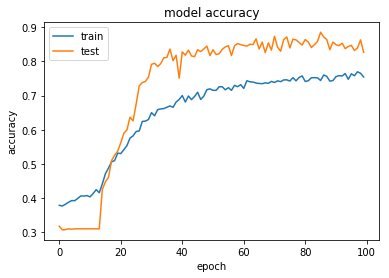

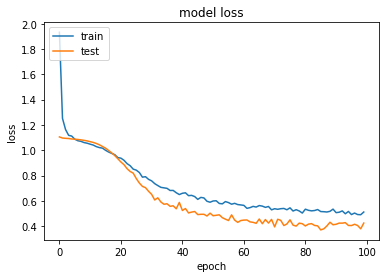

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
    pram_buymode="BUY"
    
    flag,BUY=0,0
    MONEY=1000000
    BUY_MONEY=1000000
    BUY=0
    resulst_out=""
    LEN=len(df2_num)
    GRAPH_X=[]
    GRAPH_Y=[]

    start=len(trainX)
    end=len(df2_num)-1
    print("start:",df2_num[start,0],"〜end:",df2_num[end,0])

    standard=1000000/df2_num[start,1]  #基準値 100万年

    DATE=""
    result_out=""

    
    df_sim = pd.DataFrame( columns=['Date', 'Open', 'Close', 'Up', 'result','predict','seigo'] )



    for i in range(start,end): 
        PRE=df2_num[i,np.array([
                               3,4,5,
                               6,7,8,
                               9,10,11,
                               12,13,14,
                               15,16,17,
                               18,19,20,
                               21,22,23,
                               24,25,26,
                               27,28,29,
                               30,31,32,

                               33,34,35,
                               36,37,38,
                               39,40,41,
                               42,43,44,
                               45,46,47,
                               48,49,50,
                               51,52,53,
                               54,55,56,
                               57,58,59,
                               60,61,62,

                               ])]

        #予測のコマンド
        PRE2 = model.predict_proba(np.resize(PRE,(1,trainX.shape[1])),verbose=0)
        DATE2=df2_num[i,0]
        #DATE2=DATE2[:7]
        if DATE != DATE2[:7]:       #月初の定点観測
            DATE=DATE2[:7]
            print()
            resulst_out=resulst_out+"\n"
            if DATE2[5:7]=="01":
                print("--------------------------------------------------------------------")
                resulst_out=resulst_out+"--------------------------------------------------------------------"+"\n"
            STRING=df2_num[i,0]+":資金"+"{:,}".format(int(MONEY))+"(基準"+"{:,}".format(int(standard*df2_num[i,1])).strip()+")"
            print(STRING.strip(),end="")
            result_out=result_out+STRING.strip()+"\n"



        if pram_buymode=="":

            # 買うシグナルにて、現金(BUY=0)から保持(BUY=1)。売るシグナルにて、保持(BUY=1)から現金(BUY=0)。
            if PRE2[0,0]>PRE2[0,1] and PRE2[0,0]>PRE2[0,2] and BUY==0:
                STRING="買"+DATE2[8:10]+"d"
                print("",STRING.strip(),end="")
                result_out=result_out+STRING.strip()
                

                BUY=1
                BUY_MONEY=df2_num[i,1] #df2.iloc[i,1]    



            if PRE2[0,2]>PRE2[0,1] and PRE2[0,2]>PRE2[0,0] and BUY==1:
                STRING="売"+DATE2[8:10]+"d("+"{:.1f}".format(int(df2_num[i,1]/BUY_MONEY*100-100))+"%)"
                print("",STRING.strip(),end="")
                result_out=result_out+STRING.strip()

                BUY=0
                #MONEY=df2_num[i,1]/df2_num[i,2]*MONEY
                MONEY=df2_num[i,1]/BUY_MONEY*MONEY
        else:
            # BUY_modeの場合
            PREDICT    ="None"
            if PRE2[0,0]>PRE2[0,1] and PRE2[0,0]>PRE2[0,2] :
                PREDICT="buy"
            elif PRE2[0,2]>PRE2[0,1] and PRE2[0,2]>PRE2[0,0] :
                PREDICT="sell"
            
                
            if PREDICT=="sell" :
                profit_rate=df2_num[i,1]/df2_num[i,2]  #1が終値、２が初値
                STRING="B"+DATE2[8:10]+"日("+"{:.1f}".format(int(profit_rate*100-100))+"%)"
                #print(" ",STRING.strip(),end="")
                MONEY=(profit_rate)*MONEY

            if PREDICT=="buy" :
            #if PRE2[0,2]>PRE2[0,1] and PRE2[0,2]>PRE2[0,0] :
                profit_rate=df2_num[i,1]/df2_num[i,2]
                STRING="S"+DATE2[8:10]+"日("+"{:.1f}".format(int(profit_rate*100-100))+"%)"
                #print(" ",STRING.strip(),end="")
                MONEY=(profit_rate)*MONEY
        
        
        if df2_num[i,63]==1:
            Y_result="buy"
        elif df2_num[i,65]==1:
            Y_result="sell"
        else:
            Y_result="None"
            
        seigo="×"    
        if Y_result==PREDICT:
            seigo="●"
        
        
        s1 = pd.Series([df2_num[i,0],
                        round(df2_num[i,1],2), 
                        round(df2_num[i,2],2), 
                        round((df2_num[i,2]/df2_num[i,1]-1)*100,2),
                        Y_result,PREDICT,seigo],
               index=df_sim.columns)
        #index=['Date', 'Open', 'Close', 'Up', 'result','predict','seigo'])
        
        df_sim=df_sim.append(s1,ignore_index=True)

    
#df_sim=pd.DataFrame()          

start: 2015年02月12日 〜end: 2018年08月26日

2015年02月12日:資金1,000,000(基準1,000,000)
2015年03月02日:資金1,020,014(基準1,003,461)
2015年04月01日:資金1,016,019(基準982,545)
2015年05月01日:資金1,058,981(基準979,860)
2015年06月01日:資金1,113,468(基準1,000,609)
2015年07月01日:資金1,145,091(基準988,996)
2015年08月03日:資金1,166,158(基準961,510)
2015年09月01日:資金1,143,606(基準872,958)
2015年10月01日:資金1,100,723(基準847,213)
2015年11月02日:資金1,133,071(基準861,541)
2015年12月01日:資金1,152,163(基準836,957)
--------------------------------------------------------------------
2016年01月01日:資金1,086,001(基準764,807)
2016年02月01日:資金1,091,632(基準748,030)
2016年03月01日:資金1,065,614(基準719,188)
2016年04月01日:資金1,180,114(基準747,401)
2016年05月02日:資金1,193,893(基準732,916)
2016年06月01日:資金1,137,667(基準690,346)
2016年07月01日:資金1,149,634(基準692,440)
2016年08月01日:資金1,252,463(基準723,102)
2016年09月01日:資金1,221,818(基準695,636)
2016年10月03日:資金1,303,277(基準735,109)
2016年11月01日:資金1,420,186(基準752,691)
2016年12月01日:資金1,500,752(基準795,380)
--------------------------------------------------------------------
2017年01月02日:資

In [53]:

df_sim.to_csv('data/simulation.csv',index=False)
df_sim

,Date,Open,Close,Up,result,predict,seigo
0,2015年02月12日,10.17,10.19,0.17,None,None,●
1,2015年02月13日,10.18,10.16,-0.12,None,None,●
2,2015年02月16日,10.17,10.17,-0.01,None,None,●
3,2015年02月17日,10.22,10.17,-0.49,None,buy,×
4,2015年02月18日,10.24,10.21,-0.33,None,buy,×
5,2015年02月19日,10.19,10.24,0.50,None,None,●
6,2015年02月20日,10.24,10.18,-0.62,buy,buy,●
7,2015年02月23日,10.21,10.24,0.24,None,None,●
8,2015年02月24日,10.37,10.21,-1.53,buy,buy,●
9,2015年02月25日,10.38,10.36,-0.20,None,None,●
